Kevin J. Collins

> Exercise: Data Visualization Exercise

> Week: 3

> This assignement plots the number of ISS spacewalks by the USA and Russia from 1998 to 2019. The data shows the USA had a significant lead in ISS spacewalks during the time period. The data was sourced by NASA and downloaded from 'data.world'.  



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/CodingDojo/Week_3/Spacewalks.xls'
df = pd.read_excel(filename)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  38 non-null     int64 
 1   Nation                38 non-null     object
 2   Number of Spacewalks  38 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


,Year,Nation,Number of Spacewalks
0,1998,USA,3
1,1999,USA,1
2,2000,USA,9
3,2001,USA,13
4,2002,USA,14
5,2003,USA,2
6,2005,USA,4
7,2006,USA,11
8,2007,USA,20
9,2008,USA,16


In [2]:
# Data check finds that USA is missing a contiguous entry for 2004, and Russia is missing contiguous entries for 2003 and 2019.

uSAFilter = (df.Nation == 'USA')
russiaFilter = (df.Nation == 'Russia')

# Mean() can be used here because it is only fetching a single value
uSASpacewalks = df.loc[uSAFilter, :].groupby('Year')['Number of Spacewalks'].mean()
russiaSpacewalks = df.loc[russiaFilter, :].groupby('Year')['Number of Spacewalks'].mean()

print(uSASpacewalks.index)
print(uSASpacewalks.index.size)
print(russiaSpacewalks.index)
print(russiaSpacewalks.index.size)


Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')
21
Int64Index([2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year')
17


In [3]:
# Add dataframe entries for 2003 and 2019 (Russia) and 2004 (USA). Assumption made that neither made ISS spacewalks during these years (spaceWalks = 0).

new_row = {'Year': 2004, 'Nation': 'USA', 'Number of Spacewalks': 0}
df = df.append (new_row, ignore_index=True) 

new_row = {'Year': 2003, 'Nation': 'Russia', 'Number of Spacewalks': 0}
df = df.append (new_row, ignore_index=True) 

new_row = {'Year': 2019, 'Nation': 'Russia', 'Number of Spacewalks': 0}
df = df.append (new_row, ignore_index=True) 

df


,Year,Nation,Number of Spacewalks
0,1998,USA,3
1,1999,USA,1
2,2000,USA,9
3,2001,USA,13
4,2002,USA,14
5,2003,USA,2
6,2005,USA,4
7,2006,USA,11
8,2007,USA,20
9,2008,USA,16


In [4]:
# Data now shows that both have contiguous year entries from 2001 to 2019. However, Russia is missing entries from 1998 to 2000. 

uSAFilter = (df.Nation == 'USA')
russiaFilter = (df.Nation == 'Russia')

# Mean() can be used here because it is only fetching a single value
uSASpacewalks = df.loc[uSAFilter, :].groupby('Year')['Number of Spacewalks'].mean()
russiaSpacewalks = df.loc[russiaFilter, :].groupby('Year')['Number of Spacewalks'].mean()

print(uSASpacewalks.index)
print(russiaSpacewalks.values)
print(russiaSpacewalks.index.size)
print(uSASpacewalks.index.size)

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')
[5 4 0 5 3 3 3 3 3 3 3 2 6 4 1 1 1 3 0]
19
22


In [5]:
# Use different method to populate missing Russians entries from 1998 to 2000. Again, assumption is made that Russia made no ISS spacewalks during these years (spacewalks = 0)

yearArray = np.array(uSASpacewalks.index)
uSASpacewalksArray = np.array(uSASpacewalks.values)
russiaSpacewalksArray = np.array(russiaSpacewalks.values)

temp = np.arange(yearArray.size)
gapError = yearArray.size - russiaSpacewalksArray.size 

for p in range(yearArray.size):
    if p < gapError:
        temp[p] = 0
    else:
        temp[p] = russiaSpacewalksArray[p-gapError]
    
russiaSpacewalksArray = temp
del temp

print(yearArray)
print(russiaSpacewalksArray)
print(russiaSpacewalksArray.size)
print(yearArray.size)


[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
[0 0 0 5 4 0 5 3 3 3 3 3 3 3 2 6 4 1 1 1 3 0]
22
22


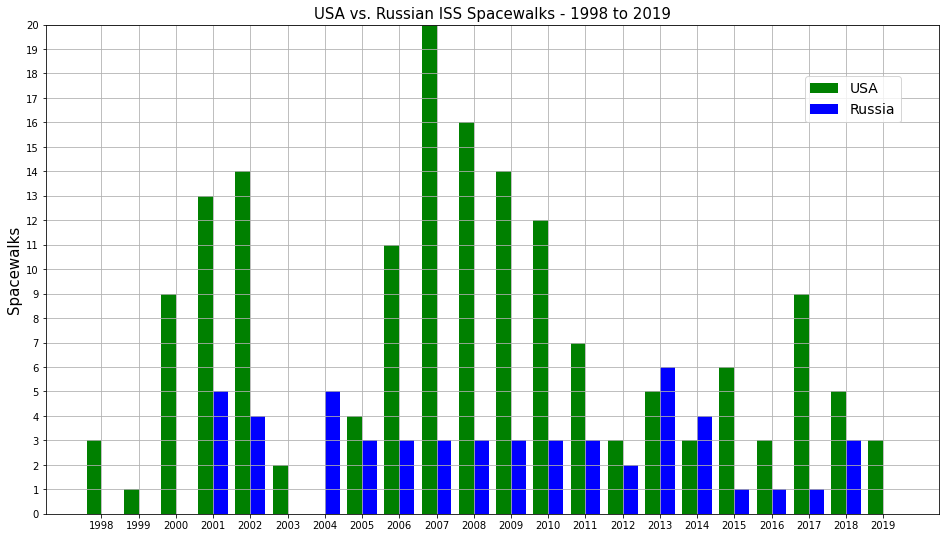

In [6]:
# Given that data cleansing is complete and now aligned, plot the data.

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,9))

axes.bar(yearArray-0.2, uSASpacewalksArray, width=0.4, color='g', align='center', label = 'USA')
axes.bar(yearArray+0.2, russiaSpacewalksArray, width=0.4, color='b', align='center', label = 'Russia')
axes.set_title('USA vs. Russian ISS Spacewalks - 1998 to 2019', fontsize = 15)
axes.set_ylabel('Spacewalks', fontsize = 15)
axes.legend(loc=(0.85,0.8), fontsize = 14)
axes.grid()
axes.set_ylim(bottom=0,top=20)

plt.xticks(np.arange(min(yearArray), max(yearArray)+1, 1.0))
plt.yticks(np.arange(0, 21, 1))

plt.show()